In [1]:
import mcmc
from SIR_model import SIR
import epi_process as ep
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


In [2]:
import pandas as pd

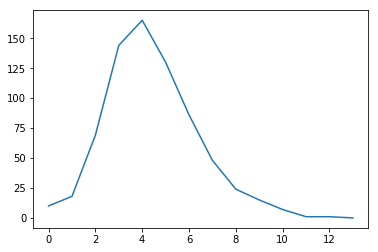

In [3]:
my_proc = ep.EpiProcess(1000, 1, False)
my_proc.run()
pseudodata = my_proc.result
plt.plot(pseudodata)
plt.show()

In [4]:
WARMUP = 10_000
ITER = 40_000

my_mcmc = mcmc.MCMC(size=1000, percent=1, t=len(pseudodata), pseudodata=pseudodata, beta_0=1, gamma_0=1, dt=1/10)
my_mcmc.run(WARMUP+ITER)

# MCMC Results

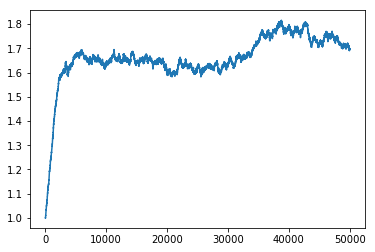

In [5]:
# plot beta
plt.plot(my_mcmc.result[:, 0])
plt.show()

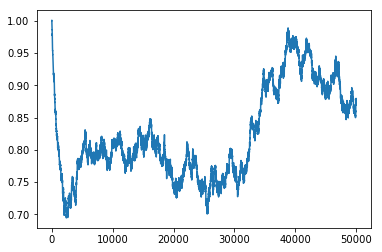

In [6]:
# plot gamma
plt.plot(my_mcmc.result[:, 1])
plt.show()

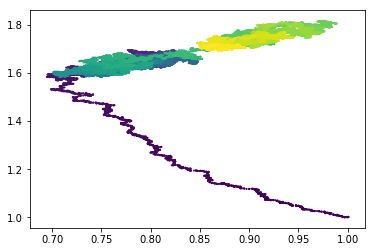

In [7]:
# plot beta and gamma together, color them based on the iteration number
plt.scatter(my_mcmc.result[:, 1], my_mcmc.result[:, 0], s=1, c=range(WARMUP+ITER), cmap="viridis")
plt.show()

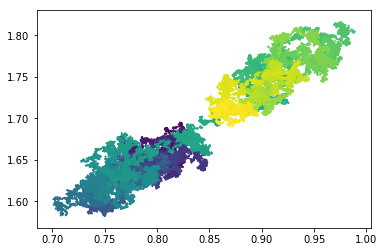

In [8]:
# plot beta and gamma together, after warm-up
plt.scatter(my_mcmc.result[WARMUP:, 1], my_mcmc.result[WARMUP:, 0], s=1, c=range(ITER), cmap="viridis")
plt.show()

# More analytics

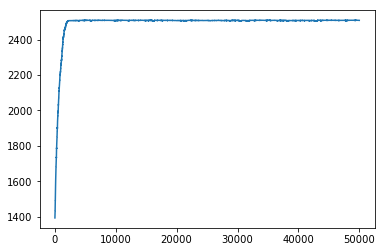

In [9]:
# plot likelihood
plt.plot(my_mcmc.extra_result[:, 0])
plt.show()

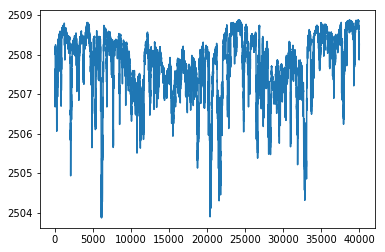

In [10]:
# plot likelihood, after warm-up phase
plt.plot(my_mcmc.extra_result[WARMUP:, 0])
plt.show()

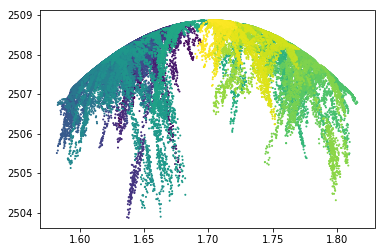

In [11]:
# plot beta vs likelihood together, after warm-up
plt.scatter(my_mcmc.result[WARMUP:, 0], my_mcmc.extra_result[WARMUP:, 0], s=1, c=range(ITER), cmap="viridis")
plt.show()

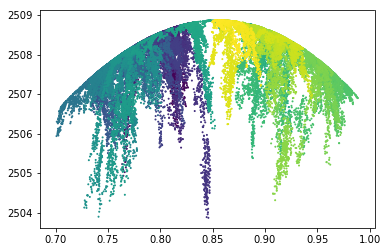

In [12]:
# plot gamma vs likelihood together, after warm-up
plt.scatter(my_mcmc.result[WARMUP:, 1], my_mcmc.extra_result[WARMUP:, 0], s=1, c=range(ITER), cmap="viridis")
plt.show()

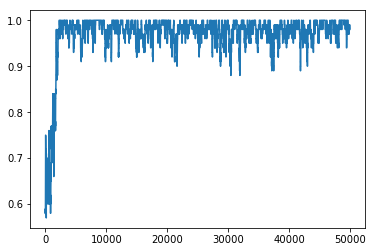

In [13]:
# plot acceptance rate

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

plt.plot(running_mean(my_mcmc.extra_result[:, 1], 100))
plt.show()

# Trajectories

In [14]:
mean_beta = my_mcmc.result[WARMUP:, 0].mean()
mean_gamma = my_mcmc.result[WARMUP:, 1].mean()
(mean_beta, mean_gamma)

(1.683191380246049, 0.8333023325737333)

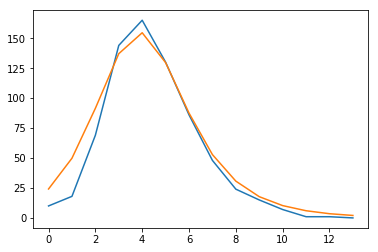

In [15]:
# mean posterior trajectory vs trajectory from the pseudodata
model = my_mcmc.model
plt.plot(pseudodata)
plt.plot(model.get_results_with_params([mean_beta, mean_gamma]))
plt.show()

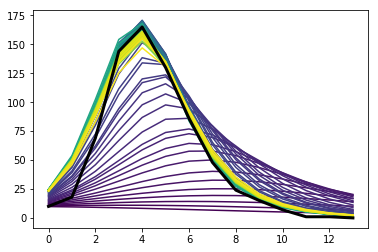

In [16]:
# show how trajectories were developing during warmup
cmap = matplotlib.cm.get_cmap('viridis')
for i in range(0, WARMUP, 100):
    plt.plot(model.get_results_with_params(my_mcmc.result[i, :]), c=cmap(i/WARMUP))
plt.plot(pseudodata, c='black', lw=3)  
plt.show()

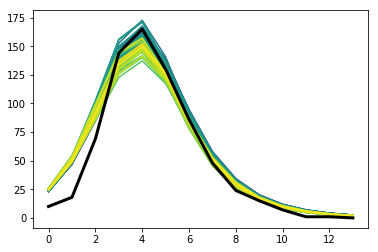

In [17]:
# show how trajectories were developing after warmup
for i in range(0, ITER, 500):
    plt.plot(model.get_results_with_params(my_mcmc.result[i+WARMUP, :]), c=cmap(i/ITER))
plt.plot(pseudodata, c='black', lw=3)  
plt.show()